In [1]:
## Importing Libraries
import datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import random
import torch
import seaborn as sns
from collections import Counter
from sklearn.model_selection import train_test_split
from tensorflow.keras import Sequential,layers, losses, optimizers
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import LabelEncoder
from keras.layers import GaussianNoise
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, precision_score

In [2]:
## Dataset Loaing
df = pd.read_csv("all_group_train_normalized.csv")

In [5]:
## Benign Data Loading
df1 = pd.read_csv("Benign Data.csv")

In [6]:
df1 = df1.loc[:, ~df1.columns.str.contains('^Unnamed')]

In [7]:
benign_data = df1.iloc[:,0:200]

In [8]:
benign_data

,ip_header_byte_2,ip_header_byte_3,ip_header_byte_4,ip_header_byte_5,ip_header_byte_6,ip_header_byte_7,ip_header_byte_8,ip_header_byte_10,ip_header_byte_11,tcp_header_byte_4,...,tcp_segment_data_byte_125,tcp_segment_data_byte_126,tcp_segment_data_byte_127,tcp_segment_data_byte_128,tcp_segment_data_byte_129,tcp_segment_data_byte_130,tcp_segment_data_byte_131,tcp_segment_data_byte_132,tcp_segment_data_byte_133,tcp_segment_data_byte_134
0,0.0,0.266667,0.098039,0.756863,0.25098,0.0,0.501961,0.015686,0.627451,0.858824,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.203922,0.400000,0.462745,0.25098,0.0,0.501961,0.690196,0.741176,0.333333,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.156863,0.294118,0.517647,0.25098,0.0,0.501961,0.823529,0.972549,0.858824,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.156863,0.321569,0.254902,0.25098,0.0,0.501961,0.800000,0.231373,0.858824,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.156863,0.035294,0.580392,0.25098,0.0,0.501961,0.078431,0.913725,0.858824,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142056,0.0,0.156863,0.074510,0.070588,0.25098,0.0,0.501961,0.043137,0.419608,0.858824,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
142057,0.0,0.156863,0.200000,0.533333,0.25098,0.0,0.501961,0.917647,0.956863,0.858824,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
142058,0.0,0.156863,0.450980,0.733333,0.25098,0.0,0.501961,0.666667,0.756863,0.858824,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
142059,0.0,0.156863,0.117647,0.439216,0.25098,0.0,0.501961,0.000000,0.050980,0.858824,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [10]:
X_train = benign_data

In [49]:
## The Denoising AE architecture, compilation and fitting
tf.random.set_seed(2)
input_dims = 200
model_DAE = Sequential()
model_DAE.add(Dense(input_dims, input_shape=(input_dims,)))
model_DAE.add(GaussianNoise(0.8, input_shape=(input_dims,)))
model_DAE.add(Dense(150, activation='relu'))
model_DAE.add(Dense(input_dims // 2, activation='relu'))
model_DAE.add(Dense(input_dims // 4, activation='relu'))
model_DAE.add(Dense(input_dims // 8, activation='relu'))
model_DAE.add(Dense(input_dims // 4, activation='relu'))
model_DAE.add(Dense(input_dims // 2, activation='relu'))
model_DAE.add(Dense(150, activation='relu'))
model_DAE.add(Dense(input_dims, activation='relu'))
model_DAE.compile(optimizer='adam', loss='mae')
model_DAE.fit(X_train, X_train, batch_size=256, epochs=500, shuffle=True)

Epoch 1/500
555/555 [==============================] - 2s 3ms/step - loss: 0.0241
Epoch 2/500
555/555 [==============================] - 2s 3ms/step - loss: 0.0193
Epoch 3/500
555/555 [==============================] - 2s 3ms/step - loss: 0.0169
Epoch 4/500
555/555 [==============================] - 2s 3ms/step - loss: 0.0163
Epoch 5/500
555/555 [==============================] - 2s 3ms/step - loss: 0.0157
Epoch 6/500
555/555 [==============================] - 2s 3ms/step - loss: 0.0151
Epoch 7/500
555/555 [==============================] - 2s 3ms/step - loss: 0.0140
Epoch 8/500
555/555 [==============================] - 2s 3ms/step - loss: 0.0135
Epoch 9/500
555/555 [==============================] - 2s 3ms/step - loss: 0.0132
Epoch 10/500
555/555 [==============================] - 2s 3ms/step - loss: 0.0126
Epoch 11/500
555/555 [==============================] - 2s 3ms/step - loss: 0.0121
Epoch 12/500
555/555 [==============================] - 2s 3ms/step - loss: 0.0116
Epoch 13/500


555/555 [==============================] - 4s 6ms/step - loss: 0.0068
Epoch 196/500
555/555 [==============================] - 4s 6ms/step - loss: 0.0068
Epoch 197/500
555/555 [==============================] - 4s 6ms/step - loss: 0.0068
Epoch 198/500
555/555 [==============================] - 4s 7ms/step - loss: 0.0068
Epoch 199/500
555/555 [==============================] - 4s 6ms/step - loss: 0.0068
Epoch 200/500
555/555 [==============================] - 3s 6ms/step - loss: 0.0067
Epoch 201/500
555/555 [==============================] - 3s 6ms/step - loss: 0.0068
Epoch 202/500
555/555 [==============================] - 4s 7ms/step - loss: 0.0067
Epoch 203/500
555/555 [==============================] - 4s 7ms/step - loss: 0.0068
Epoch 204/500
555/555 [==============================] - 4s 6ms/step - loss: 0.0068
Epoch 205/500
555/555 [==============================] - 3s 6ms/step - loss: 0.0069
Epoch 206/500
555/555 [==============================] - 4s 6ms/step - loss: 0.0068
Epoch 

555/555 [==============================] - 3s 5ms/step - loss: 0.0065
Epoch 389/500
555/555 [==============================] - 2s 4ms/step - loss: 0.0064
Epoch 390/500
555/555 [==============================] - 3s 5ms/step - loss: 0.0064A: 0s - loss
Epoch 391/500
555/555 [==============================] - 3s 5ms/step - loss: 0.0064
Epoch 392/500
555/555 [==============================] - 2s 4ms/step - loss: 0.0064
Epoch 393/500
555/555 [==============================] - 3s 5ms/step - loss: 0.0064
Epoch 394/500
555/555 [==============================] - 3s 5ms/step - loss: 0.0064
Epoch 395/500
555/555 [==============================] - 2s 4ms/step - loss: 0.0064
Epoch 396/500
555/555 [==============================] - 2s 4ms/step - loss: 0.0064
Epoch 397/500
555/555 [==============================] - 2s 4ms/step - loss: 0.0065
Epoch 398/500
555/555 [==============================] - 2s 4ms/step - loss: 0.0066
Epoch 399/500
555/555 [==============================] - 3s 5ms/step - loss: 0

In [12]:
## Experiment 1

In [ ]:
## Reconstructing different attack types and aversarial examples and Classifying them based on the thresholds

In [50]:
infiltration_attack = df[df['Label'] == 'Infiltration'].drop(['Label_binary','Label'], axis=1).iloc[:,0:200]
print(infiltration_attack.shape)
portscan_attack = df[df['Label'] == 'Port Scan'].drop(['Label_binary','Label'], axis=1).iloc[:,0:200]
print(portscan_attack.shape)
ddos_attack = df[df['Label'] == 'DDoS'].drop(['Label_binary','Label'], axis=1).iloc[:,0:200]
print(ddos_attack.shape)
bruteforce_attack = df[df['Label'] == 'Brute Force'].drop(['Label_binary','Label'], axis=1).iloc[:,0:200]
print(bruteforce_attack.shape)
dos_attack = df[df['Label'] == 'DoS'].drop(['Label_binary','Label'], axis=1).iloc[:,0:200]
print(dos_attack.shape)
web_attack = df[df['Label'] == 'Web Attack'].drop(['Label_binary','Label'], axis=1).iloc[:,0:200]
print(web_attack.shape)

(8905, 200)
(8905, 200)
(8905, 200)
(8905, 200)
(8906, 200)
(8906, 200)


In [51]:
# infiltration_attack = df_2018[df_2018['Label'] == 'Infiltration'].drop(['Label_binary','Label'], axis=1).iloc[:,0:200]
# print(infiltration_attack.shape)
# # portscan_attack = df_2018[df_2018['Label'] == 'Port Scan'].drop(['Label_binary','Label'], axis=1).iloc[:,0:200]
# # print(portscan_attack.shape)
# ddos_attack = df_2018[df_2018['Label'] == 'DDoS'].drop(['Label_binary','Label'], axis=1).iloc[:,0:200]
# print(ddos_attack.shape)
# bruteforce_attack = df_2018[df_2018['Label'] == 'Brute Force'].drop(['Label_binary','Label'], axis=1).iloc[:,0:200]
# print(bruteforce_attack.shape)
# dos_attack = df_2018[df_2018['Label'] == 'DoS'].drop(['Label_binary','Label'], axis=1).iloc[:,0:200]
# print(dos_attack.shape)
# web_attack = df_2018[df_2018['Label'] == 'Web Attack'].drop(['Label_binary','Label'], axis=1).iloc[:,0:200]
# print(web_attack.shape)

In [52]:
def recon_metrices(data, reconstructed_data):

    maes = np.absolute(data.values - reconstructed_data)
    
    for j in range(len(maes)):
        m = maes[j]
        r = reconstructed_data[j]
        for el in range(len(m)):
            if r[el] == 0:
                m[el] = 0
 
            
    mae_byte_list = []
    ip_mae_list = []
    tcp_header_mae_list = []
    tcp_options_mae_list = []
    tcp_segment_mae_list = []
    i=0
    for mae in maes:
        mae_byte = sum(mae) / np.count_nonzero(reconstructed_data[i])
        mae_byte_list.append(mae_byte)
        
        if np.count_nonzero(reconstructed_data[i][0:9]) != 0:
            ip_mae = sum(mae[0:9])/np.count_nonzero(reconstructed_data[i][0:9])
        else:
            ip_mae = 0
        ip_mae_list.append(ip_mae)

        if np.count_nonzero(reconstructed_data[i][9:25]) != 0:
            tcp_header_mae = sum(mae[9:25])/np.count_nonzero(reconstructed_data[i][9:25])
        else:
            tcp_header_mae = 0
        tcp_header_mae_list.append(tcp_header_mae)

        if np.count_nonzero(reconstructed_data[i][25:65]) != 0:
            tcp_options_mae = sum(mae[25:65])/np.count_nonzero(reconstructed_data[i][25:65])
        else:
            tcp_options_mae = 0
        tcp_options_mae_list.append(tcp_options_mae)

        if np.count_nonzero(reconstructed_data[i][65:200]) != 0:
            tcp_segment_mae = sum(mae[65:200])/np.count_nonzero(reconstructed_data[i][65:200])
        else:
            tcp_segment_mae = 0
        tcp_segment_mae_list.append(tcp_segment_mae)
        i += 1
    return mae_byte_list, ip_mae_list, tcp_header_mae_list, tcp_options_mae_list, tcp_segment_mae_list

In [53]:
recon_x_test_normal = model_DAE.predict(benign_data)

In [54]:
mae_byte_list_normal, ip_mae_list_normal, tcp_header_mae_list_normal, tcp_options_mae_list_normal, tcp_segment_mae_list_normal = recon_metrices(benign_data, recon_x_test_normal)

In [160]:
# save numpy array as csv file
from numpy import asarray
from numpy import savetxt

savetxt('DAE_benign_MAE.csv', mae_byte_list_normal, delimiter=',')

In [55]:
diff = []
for i in range(len(recon_x_test_normal)):
    diff.append(np.count_nonzero(recon_x_test_normal[i]) - np.count_nonzero(benign_data.iloc[i].values))

In [56]:
pos = 0
neg = 0
zer = 0
for el in diff:
    if el > 0:
        pos+=1
    elif el < 0:
        neg +=1
    else:
        zer += 1

In [57]:
print(pos)
print(neg)
print(zer)

7276
15353
119432


In [58]:
mae_byte_avg = sum(mae_byte_list_normal) / np.count_nonzero(mae_byte_list_normal)
print('mae_byte_avg', mae_byte_avg)
mae_byte_per_95 = np.percentile(mae_byte_list_normal, 99)
print('mae_byte_99_percentile', mae_byte_per_95)
mae_byte_per_95 = np.percentile(mae_byte_list_normal, 95)
print('mae_byte_95_percentile', mae_byte_per_95)
mae_byte_per_95 = np.percentile(mae_byte_list_normal, 90)
print('mae_byte_90_percentile', mae_byte_per_95)
ip_mae_avg = sum(ip_mae_list_normal) / np.count_nonzero(ip_mae_list_normal)
print('ip_mae_avg', ip_mae_avg)
tcp_header_mae_avg = sum(tcp_header_mae_list_normal) / np.count_nonzero(tcp_header_mae_list_normal)
print('tcp_header_mae_avg', tcp_header_mae_avg)
tcp_options_mae_avg = sum(tcp_options_mae_list_normal) / np.count_nonzero(tcp_options_mae_list_normal)
print('tcp_header_mae_avg', tcp_options_mae_avg)
tcp_segment_mae_avg = sum(tcp_segment_mae_list_normal) / np.count_nonzero(tcp_segment_mae_list_normal)
print('tcp_segment_mae_avg', tcp_segment_mae_avg)

mae_byte_avg 0.010910673379212987
mae_byte_99_percentile 0.14152858223934262
mae_byte_95_percentile 0.03614259737165895
mae_byte_90_percentile 0.012558622331985464
ip_mae_avg 0.009386922048024458
tcp_header_mae_avg 0.010737101400638332
tcp_header_mae_avg 0.046654229198423935
tcp_segment_mae_avg 0.11306818818446489


In [94]:
recon_portscan = model_DAE.predict(portscan_attack)

In [95]:
mae_byte_list, ip_mae_list, tcp_header_mae_list, tcp_options_mae_list, tcp_segment_mae_list = recon_metrices(portscan_attack, recon_portscan)

In [96]:
# save numpy array as csv file
from numpy import asarray
from numpy import savetxt

savetxt('DAE_portscan_MAE.csv', mae_byte_list, delimiter=',')

In [97]:
## Classification
count_99 = len([i for i in mae_byte_list if i > 0.14])
print(count_99 / len(mae_byte_list))
count_95 = len([i for i in mae_byte_list if i > 0.03])
print(count_95 / len(mae_byte_list))
count_90 = len([i for i in mae_byte_list if i > 0.01])
print(count_90 / len(mae_byte_list))

0.4775968556990455
1.0
1.0


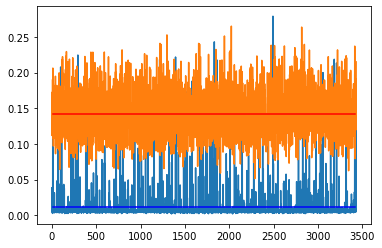

In [98]:
## Portscan mae byte
AE_normal_mae = mae_byte_list_normal[0:3432]
plt.plot(AE_normal_mae)
# plt.fill_between([i for i in range(3432)],np.array(AE_normal_mae).mean() + np.array(AE_normal_mae).std(),\
#                  max(np.array(AE_normal_mae).mean() - np.array(AE_normal_mae).std(),0),color = "black",alpha = 0.3)
plt.axhline(y = np.array(AE_normal_mae).mean(), color = 'blue', linestyle = '-',xmin = 0.05, xmax = 0.95)

AE_infiltration_attack_mae = mae_byte_list[0:3432]
plt.plot(AE_infiltration_attack_mae)
# plt.fill_between([i for i in range(3432)],np.array(AE_infiltration_attack_mae).mean() - np.array(AE_infiltration_attack_mae).std(),\
#                  np.array(AE_infiltration_attack_mae).mean() + np.array(AE_infiltration_attack_mae).std(),color = "orange",alpha = 0.3)
plt.axhline(y = np.array(AE_infiltration_attack_mae).mean(), color = 'r', linestyle = '-',xmin = 0.05, xmax = 0.95)

In [ ]:
## Portscan IP header
AE_normal_mae = ip_mae_list_normal[0:3432]
plt.plot(AE_normal_mae)
plt.fill_between([i for i in range(3432)],np.array(AE_normal_mae).mean() + np.array(AE_normal_mae).std(),\
                 max(np.array(AE_normal_mae).mean() - np.array(AE_normal_mae).std(),0),color = "black",alpha = 0.3)
plt.axhline(y = np.array(AE_normal_mae).mean(), color = 'blue', linestyle = '-',xmin = 0.05, xmax = 0.95)

AE_infiltration_attack_mae = ip_mae_list[0:3432]
plt.plot(AE_infiltration_attack_mae)
plt.fill_between([i for i in range(3432)],np.array(AE_infiltration_attack_mae).mean() - np.array(AE_infiltration_attack_mae).std(),\
                 np.array(AE_infiltration_attack_mae).mean() + np.array(AE_infiltration_attack_mae).std(),color = "orange",alpha = 0.3)
plt.axhline(y = np.array(AE_infiltration_attack_mae).mean(), color = 'r', linestyle = '-',xmin = 0.05, xmax = 0.95)

In [ ]:
## Portscan TCP header
AE_normal_mae = tcp_header_mae_list_normal[0:3432]
plt.plot(AE_normal_mae)
plt.fill_between([i for i in range(3432)],np.array(AE_normal_mae).mean() + np.array(AE_normal_mae).std(),\
                 max(np.array(AE_normal_mae).mean() - np.array(AE_normal_mae).std(),0),color = "black",alpha = 0.3)
plt.axhline(y = np.array(AE_normal_mae).mean(), color = 'blue', linestyle = '-',xmin = 0.05, xmax = 0.95)

AE_infiltration_attack_mae = tcp_header_mae_list[0:3432]
plt.plot(AE_infiltration_attack_mae)
plt.fill_between([i for i in range(3432)],np.array(AE_infiltration_attack_mae).mean() - np.array(AE_infiltration_attack_mae).std(),\
                 np.array(AE_infiltration_attack_mae).mean() + np.array(AE_infiltration_attack_mae).std(),color = "orange",alpha = 0.3)
plt.axhline(y = np.array(AE_infiltration_attack_mae).mean(), color = 'r', linestyle = '-',xmin = 0.05, xmax = 0.95)

In [ ]:
## Portscan TCP Options
AE_normal_mae = tcp_options_mae_list_normal[0:3432]
plt.plot(AE_normal_mae)
plt.fill_between([i for i in range(3432)],np.array(AE_normal_mae).mean() + np.array(AE_normal_mae).std(),\
                 max(np.array(AE_normal_mae).mean() - np.array(AE_normal_mae).std(),0),color = "black",alpha = 0.3)
plt.axhline(y = np.array(AE_normal_mae).mean(), color = 'blue', linestyle = '-',xmin = 0.05, xmax = 0.95)

AE_infiltration_attack_mae = tcp_options_mae_list[0:3432]
plt.plot(AE_infiltration_attack_mae)
plt.fill_between([i for i in range(3432)],np.array(AE_infiltration_attack_mae).mean() - np.array(AE_infiltration_attack_mae).std(),\
                 np.array(AE_infiltration_attack_mae).mean() + np.array(AE_infiltration_attack_mae).std(),color = "orange",alpha = 0.3)
plt.axhline(y = np.array(AE_infiltration_attack_mae).mean(), color = 'r', linestyle = '-',xmin = 0.05, xmax = 0.95)

In [ ]:
## Portscan Segment
AE_normal_mae = tcp_segment_mae_list_normal[0:3432]
plt.plot(AE_normal_mae)
plt.fill_between([i for i in range(3432)],np.array(AE_normal_mae).mean() + np.array(AE_normal_mae).std(),\
                 max(np.array(AE_normal_mae).mean() - np.array(AE_normal_mae).std(),0),color = "black",alpha = 0.3)
plt.axhline(y = np.array(AE_normal_mae).mean(), color = 'blue', linestyle = '-',xmin = 0.05, xmax = 0.95)

AE_infiltration_attack_mae = tcp_segment_mae_list[0:3432]
plt.plot(AE_infiltration_attack_mae)
plt.fill_between([i for i in range(3432)],np.array(AE_infiltration_attack_mae).mean() - np.array(AE_infiltration_attack_mae).std(),\
                 np.array(AE_infiltration_attack_mae).mean() + np.array(AE_infiltration_attack_mae).std(),color = "orange",alpha = 0.3)
plt.axhline(y = np.array(AE_infiltration_attack_mae).mean(), color = 'r', linestyle = '-',xmin = 0.05, xmax = 0.95)

In [63]:
mae_byte_avg = sum(mae_byte_list) / np.count_nonzero(mae_byte_list)
print('mae_byte_avg', mae_byte_avg)
mae_byte_per_95 = np.percentile(mae_byte_list, 99)
print('mae_byte_99_percentile', mae_byte_per_95)
mae_byte_per_95 = np.percentile(mae_byte_list, 95)
print('mae_byte_95_percentile', mae_byte_per_95)
mae_byte_per_95 = np.percentile(mae_byte_list, 90)
print('mae_byte_90_percentile', mae_byte_per_95)
ip_mae_avg = sum(ip_mae_list) / np.count_nonzero(ip_mae_list)
print('ip_mae_avg', ip_mae_avg)
tcp_header_mae_avg = sum(tcp_header_mae_list) / np.count_nonzero(tcp_header_mae_list)
print('tcp_header_mae_avg', tcp_header_mae_avg)
tcp_options_mae_avg = sum(tcp_options_mae_list) / np.count_nonzero(tcp_options_mae_list)
print('tcp_header_mae_avg', tcp_options_mae_avg)
tcp_segment_mae_avg = sum(tcp_segment_mae_list) / np.count_nonzero(tcp_segment_mae_list)
print('tcp_segment_mae_avg', tcp_segment_mae_avg)

mae_byte_avg 0.14105336207382083
mae_byte_99_percentile 0.22416810231214518
mae_byte_95_percentile 0.19697545070600755
mae_byte_90_percentile 0.18292865184787055
ip_mae_avg 0.1746812228181106
tcp_header_mae_avg 0.1196037634874945
tcp_header_mae_avg 0.09147826728037815
tcp_segment_mae_avg 0.060264028387772714


In [99]:
recon_dos = model_DAE.predict(dos_attack)

In [100]:
mae_byte_list, ip_mae_list, tcp_header_mae_list, tcp_options_mae_list, tcp_segment_mae_list = recon_metrices(dos_attack, recon_dos)

In [101]:
## Classification
count_99 = len([i for i in mae_byte_list if i > 0.14])
print(count_99 / len(mae_byte_list))
count_95 = len([i for i in mae_byte_list if i > 0.03])
print(count_95 / len(mae_byte_list))
count_90 = len([i for i in mae_byte_list if i > 0.01])
print(count_90 / len(mae_byte_list))

0.4859645183022681
1.0
1.0


In [102]:
# save numpy array as csv file
from numpy import asarray
from numpy import savetxt

savetxt('DAE_dos_MAE.csv', mae_byte_list, delimiter=',')

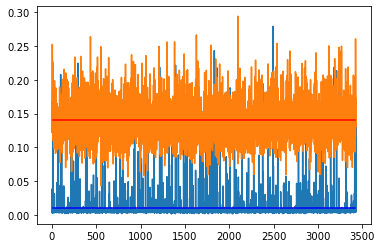

In [103]:
## DoS mae byte
AE_normal_mae = mae_byte_list_normal[0:3432]
plt.plot(AE_normal_mae)
# plt.fill_between([i for i in range(3432)],np.array(AE_normal_mae).mean() + np.array(AE_normal_mae).std(),\
#                  max(np.array(AE_normal_mae).mean() - np.array(AE_normal_mae).std(),0),color = "black",alpha = 0.3)
plt.axhline(y = np.array(AE_normal_mae).mean(), color = 'blue', linestyle = '-',xmin = 0.05, xmax = 0.95)

AE_infiltration_attack_mae = mae_byte_list[0:3432]
plt.plot(AE_infiltration_attack_mae)
# plt.fill_between([i for i in range(3432)],np.array(AE_infiltration_attack_mae).mean() - np.array(AE_infiltration_attack_mae).std(),\
#                  np.array(AE_infiltration_attack_mae).mean() + np.array(AE_infiltration_attack_mae).std(),color = "orange",alpha = 0.3)
plt.axhline(y = np.array(AE_infiltration_attack_mae).mean(), color = 'r', linestyle = '-',xmin = 0.05, xmax = 0.95)

In [ ]:
## DoS IP header
AE_normal_mae = ip_mae_list_normal[0:3432]
plt.plot(AE_normal_mae)
plt.fill_between([i for i in range(3432)],np.array(AE_normal_mae).mean() + np.array(AE_normal_mae).std(),\
                 max(np.array(AE_normal_mae).mean() - np.array(AE_normal_mae).std(),0),color = "black",alpha = 0.3)
plt.axhline(y = np.array(AE_normal_mae).mean(), color = 'blue', linestyle = '-',xmin = 0.05, xmax = 0.95)

AE_infiltration_attack_mae = ip_mae_list[0:3432]
plt.plot(AE_infiltration_attack_mae)
plt.fill_between([i for i in range(3432)],np.array(AE_infiltration_attack_mae).mean() - np.array(AE_infiltration_attack_mae).std(),\
                 np.array(AE_infiltration_attack_mae).mean() + np.array(AE_infiltration_attack_mae).std(),color = "orange",alpha = 0.3)
plt.axhline(y = np.array(AE_infiltration_attack_mae).mean(), color = 'r', linestyle = '-',xmin = 0.05, xmax = 0.95)

In [ ]:
## DoS TCP header
AE_normal_mae = tcp_header_mae_list_normal[0:3432]
plt.plot(AE_normal_mae)
plt.fill_between([i for i in range(3432)],np.array(AE_normal_mae).mean() + np.array(AE_normal_mae).std(),\
                 max(np.array(AE_normal_mae).mean() - np.array(AE_normal_mae).std(),0),color = "black",alpha = 0.3)
plt.axhline(y = np.array(AE_normal_mae).mean(), color = 'blue', linestyle = '-',xmin = 0.05, xmax = 0.95)

AE_infiltration_attack_mae = tcp_header_mae_list[0:3432]
plt.plot(AE_infiltration_attack_mae)
plt.fill_between([i for i in range(3432)],np.array(AE_infiltration_attack_mae).mean() - np.array(AE_infiltration_attack_mae).std(),\
                 np.array(AE_infiltration_attack_mae).mean() + np.array(AE_infiltration_attack_mae).std(),color = "orange",alpha = 0.3)
plt.axhline(y = np.array(AE_infiltration_attack_mae).mean(), color = 'r', linestyle = '-',xmin = 0.05, xmax = 0.95)

In [ ]:
## DoS TCP Options
AE_normal_mae = tcp_options_mae_list_normal[0:3432]
plt.plot(AE_normal_mae)
plt.fill_between([i for i in range(3432)],np.array(AE_normal_mae).mean() + np.array(AE_normal_mae).std(),\
                 max(np.array(AE_normal_mae).mean() - np.array(AE_normal_mae).std(),0),color = "black",alpha = 0.3)
plt.axhline(y = np.array(AE_normal_mae).mean(), color = 'blue', linestyle = '-',xmin = 0.05, xmax = 0.95)

AE_infiltration_attack_mae = tcp_options_mae_list[0:3432]
plt.plot(AE_infiltration_attack_mae)
plt.fill_between([i for i in range(3432)],np.array(AE_infiltration_attack_mae).mean() - np.array(AE_infiltration_attack_mae).std(),\
                 np.array(AE_infiltration_attack_mae).mean() + np.array(AE_infiltration_attack_mae).std(),color = "orange",alpha = 0.3)
plt.axhline(y = np.array(AE_infiltration_attack_mae).mean(), color = 'r', linestyle = '-',xmin = 0.05, xmax = 0.95)

In [ ]:
## DoS Segment
AE_normal_mae = tcp_segment_mae_list_normal[0:3432]
plt.plot(AE_normal_mae)
plt.fill_between([i for i in range(3432)],np.array(AE_normal_mae).mean() + np.array(AE_normal_mae).std(),\
                 max(np.array(AE_normal_mae).mean() - np.array(AE_normal_mae).std(),0),color = "black",alpha = 0.3)
plt.axhline(y = np.array(AE_normal_mae).mean(), color = 'blue', linestyle = '-',xmin = 0.05, xmax = 0.95)

AE_infiltration_attack_mae = tcp_segment_mae_list[0:3432]
plt.plot(AE_infiltration_attack_mae)
plt.fill_between([i for i in range(3432)],np.array(AE_infiltration_attack_mae).mean() - np.array(AE_infiltration_attack_mae).std(),\
                 np.array(AE_infiltration_attack_mae).mean() + np.array(AE_infiltration_attack_mae).std(),color = "orange",alpha = 0.3)
plt.axhline(y = np.array(AE_infiltration_attack_mae).mean(), color = 'r', linestyle = '-',xmin = 0.05, xmax = 0.95)

In [104]:
mae_byte_avg = sum(mae_byte_list) / np.count_nonzero(mae_byte_list)
print('mae_byte_avg', mae_byte_avg)
mae_byte_per_95 = np.percentile(mae_byte_list, 99)
print('mae_byte_99_percentile', mae_byte_per_95)
mae_byte_per_95 = np.percentile(mae_byte_list, 95)
print('mae_byte_95_percentile', mae_byte_per_95)
mae_byte_per_95 = np.percentile(mae_byte_list, 90)
print('mae_byte_90_percentile', mae_byte_per_95)
ip_mae_avg = sum(ip_mae_list) / np.count_nonzero(ip_mae_list)
print('ip_mae_avg', ip_mae_avg)
tcp_header_mae_avg = sum(tcp_header_mae_list) / np.count_nonzero(tcp_header_mae_list)
print('tcp_header_mae_avg', tcp_header_mae_avg)
tcp_options_mae_avg = sum(tcp_options_mae_list) / np.count_nonzero(tcp_options_mae_list)
print('tcp_header_mae_avg', tcp_options_mae_avg)
tcp_segment_mae_avg = sum(tcp_segment_mae_list) / np.count_nonzero(tcp_segment_mae_list)
print('tcp_segment_mae_avg', tcp_segment_mae_avg)

mae_byte_avg 0.14035068205033255
mae_byte_99_percentile 0.22483929784203976
mae_byte_95_percentile 0.19361459139658996
mae_byte_90_percentile 0.17830721842025754
ip_mae_avg 0.16193795401565841
tcp_header_mae_avg 0.1306646553441909
tcp_header_mae_avg 0.15968912049339307
tcp_segment_mae_avg 0.12508228486993905


In [105]:
recon_ddos = model_DAE.predict(ddos_attack)

In [106]:
mae_byte_list, ip_mae_list, tcp_header_mae_list, tcp_options_mae_list, tcp_segment_mae_list = recon_metrices(ddos_attack, recon_ddos)

In [108]:
## Classification
count_99 = len([i for i in mae_byte_list if i > 0.14])
print(count_99 / len(mae_byte_list))
count_95 = len([i for i in mae_byte_list if i > 0.03])
print(count_95 / len(mae_byte_list))
count_90 = len([i for i in mae_byte_list if i > 0.01])
print(count_90 / len(mae_byte_list))

0.14362717574396405
0.9997754070746772
1.0


In [109]:
# save numpy array as csv file
from numpy import asarray
from numpy import savetxt

savetxt('DAE_ddos_MAE.csv', mae_byte_list, delimiter=',')

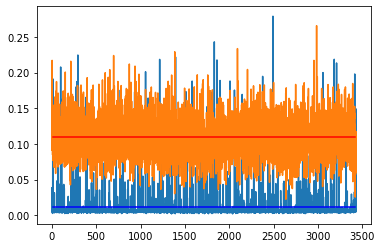

In [110]:
## DDoS
AE_normal_mae = mae_byte_list_normal[0:3432]
plt.plot(AE_normal_mae)
# plt.fill_between([i for i in range(3432)],np.array(AE_normal_mae).mean() + np.array(AE_normal_mae).std(),\
#                  max(np.array(AE_normal_mae).mean() - np.array(AE_normal_mae).std(),0),color = "black",alpha = 0.3)
plt.axhline(y = np.array(AE_normal_mae).mean(), color = 'blue', linestyle = '-',xmin = 0.05, xmax = 0.95)

AE_infiltration_attack_mae = mae_byte_list[0:3432]
plt.plot(AE_infiltration_attack_mae)
# plt.fill_between([i for i in range(3432)],np.array(AE_infiltration_attack_mae).mean() - np.array(AE_infiltration_attack_mae).std(),\
#                  np.array(AE_infiltration_attack_mae).mean() + np.array(AE_infiltration_attack_mae).std(),color = "orange",alpha = 0.3)
plt.axhline(y = np.array(AE_infiltration_attack_mae).mean(), color = 'r', linestyle = '-',xmin = 0.05, xmax = 0.95)

In [ ]:
## DDoS IP header
AE_normal_mae = ip_mae_list_normal[0:3432]
plt.plot(AE_normal_mae)
plt.fill_between([i for i in range(3432)],np.array(AE_normal_mae).mean() + np.array(AE_normal_mae).std(),\
                 max(np.array(AE_normal_mae).mean() - np.array(AE_normal_mae).std(),0),color = "black",alpha = 0.3)
plt.axhline(y = np.array(AE_normal_mae).mean(), color = 'blue', linestyle = '-',xmin = 0.05, xmax = 0.95)

AE_infiltration_attack_mae = ip_mae_list[0:3432]
plt.plot(AE_infiltration_attack_mae)
plt.fill_between([i for i in range(3432)],np.array(AE_infiltration_attack_mae).mean() - np.array(AE_infiltration_attack_mae).std(),\
                 np.array(AE_infiltration_attack_mae).mean() + np.array(AE_infiltration_attack_mae).std(),color = "orange",alpha = 0.3)
plt.axhline(y = np.array(AE_infiltration_attack_mae).mean(), color = 'r', linestyle = '-',xmin = 0.05, xmax = 0.95)

In [ ]:
## DDoS TCP header
AE_normal_mae = tcp_header_mae_list_normal[0:3432]
plt.plot(AE_normal_mae)
plt.fill_between([i for i in range(3432)],np.array(AE_normal_mae).mean() + np.array(AE_normal_mae).std(),\
                 max(np.array(AE_normal_mae).mean() - np.array(AE_normal_mae).std(),0),color = "black",alpha = 0.3)
plt.axhline(y = np.array(AE_normal_mae).mean(), color = 'blue', linestyle = '-',xmin = 0.05, xmax = 0.95)

AE_infiltration_attack_mae = tcp_header_mae_list[0:3432]
plt.plot(AE_infiltration_attack_mae)
plt.fill_between([i for i in range(3432)],np.array(AE_infiltration_attack_mae).mean() - np.array(AE_infiltration_attack_mae).std(),\
                 np.array(AE_infiltration_attack_mae).mean() + np.array(AE_infiltration_attack_mae).std(),color = "orange",alpha = 0.3)
plt.axhline(y = np.array(AE_infiltration_attack_mae).mean(), color = 'r', linestyle = '-',xmin = 0.05, xmax = 0.95)

In [ ]:
## DDoS TCP Options
AE_normal_mae = tcp_options_mae_list_normal[0:3432]
plt.plot(AE_normal_mae)
plt.fill_between([i for i in range(3432)],np.array(AE_normal_mae).mean() + np.array(AE_normal_mae).std(),\
                 max(np.array(AE_normal_mae).mean() - np.array(AE_normal_mae).std(),0),color = "black",alpha = 0.3)
plt.axhline(y = np.array(AE_normal_mae).mean(), color = 'blue', linestyle = '-',xmin = 0.05, xmax = 0.95)

AE_infiltration_attack_mae = tcp_options_mae_list[0:3432]
plt.plot(AE_infiltration_attack_mae)
plt.fill_between([i for i in range(3432)],np.array(AE_infiltration_attack_mae).mean() - np.array(AE_infiltration_attack_mae).std(),\
                 np.array(AE_infiltration_attack_mae).mean() + np.array(AE_infiltration_attack_mae).std(),color = "orange",alpha = 0.3)
plt.axhline(y = np.array(AE_infiltration_attack_mae).mean(), color = 'r', linestyle = '-',xmin = 0.05, xmax = 0.95)

In [ ]:
## DDoS Segment
AE_normal_mae = tcp_segment_mae_list_normal[0:3432]
plt.plot(AE_normal_mae)
plt.fill_between([i for i in range(3432)],np.array(AE_normal_mae).mean() + np.array(AE_normal_mae).std(),\
                 max(np.array(AE_normal_mae).mean() - np.array(AE_normal_mae).std(),0),color = "black",alpha = 0.3)
plt.axhline(y = np.array(AE_normal_mae).mean(), color = 'blue', linestyle = '-',xmin = 0.05, xmax = 0.95)

AE_infiltration_attack_mae = tcp_segment_mae_list[0:3432]
plt.plot(AE_infiltration_attack_mae)
plt.fill_between([i for i in range(3432)],np.array(AE_infiltration_attack_mae).mean() - np.array(AE_infiltration_attack_mae).std(),\
                 np.array(AE_infiltration_attack_mae).mean() + np.array(AE_infiltration_attack_mae).std(),color = "orange",alpha = 0.3)
plt.axhline(y = np.array(AE_infiltration_attack_mae).mean(), color = 'r', linestyle = '-',xmin = 0.05, xmax = 0.95)

In [111]:
mae_byte_avg = sum(mae_byte_list) / np.count_nonzero(mae_byte_list)
print('mae_byte_avg', mae_byte_avg)
mae_byte_per_95 = np.percentile(mae_byte_list, 99)
print('mae_byte_99_percentile', mae_byte_per_95)
mae_byte_per_95 = np.percentile(mae_byte_list, 95)
print('mae_byte_95_percentile', mae_byte_per_95)
mae_byte_per_95 = np.percentile(mae_byte_list, 90)
print('mae_byte_90_percentile', mae_byte_per_95)
ip_mae_avg = sum(ip_mae_list) / np.count_nonzero(ip_mae_list)
print('ip_mae_avg', ip_mae_avg)
tcp_header_mae_avg = sum(tcp_header_mae_list) / np.count_nonzero(tcp_header_mae_list)
print('tcp_header_mae_avg', tcp_header_mae_avg)
tcp_options_mae_avg = sum(tcp_options_mae_list) / np.count_nonzero(tcp_options_mae_list)
print('tcp_header_mae_avg', tcp_options_mae_avg)
tcp_segment_mae_avg = sum(tcp_segment_mae_list) / np.count_nonzero(tcp_segment_mae_list)
print('tcp_segment_mae_avg', tcp_segment_mae_avg)

mae_byte_avg 0.1087351278742462
mae_byte_99_percentile 0.1835171186851064
mae_byte_95_percentile 0.1587663445675936
mae_byte_90_percentile 0.1472482597080861
ip_mae_avg 0.11651910851393517
tcp_header_mae_avg 0.1052203703844696
tcp_header_mae_avg 0.08420856249992019
tcp_segment_mae_avg 0.049076412333541625


In [112]:
recon_infiltration = model_DAE.predict(infiltration_attack)

In [113]:
mae_byte_list, ip_mae_list, tcp_header_mae_list, tcp_options_mae_list, tcp_segment_mae_list = recon_metrices(infiltration_attack, recon_infiltration)

In [114]:
## Classification
count_99 = len([i for i in mae_byte_list if i > 0.14])
print(count_99 / len(mae_byte_list))
count_95 = len([i for i in mae_byte_list if i > 0.03])
print(count_95 / len(mae_byte_list))
count_90 = len([i for i in mae_byte_list if i > 0.01])
print(count_90 / len(mae_byte_list))

0.47883211678832116
1.0
1.0


In [115]:
# save numpy array as csv file
from numpy import asarray
from numpy import savetxt

savetxt('DAE_infiltration_MAE.csv', mae_byte_list, delimiter=',')

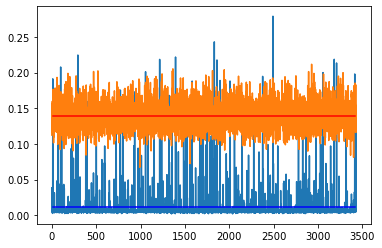

In [116]:
## Infiltration
AE_normal_mae = mae_byte_list_normal[0:3432]
plt.plot(AE_normal_mae)
# plt.fill_between([i for i in range(3432)],np.array(AE_normal_mae).mean() + np.array(AE_normal_mae).std(),\
#                  max(np.array(AE_normal_mae).mean() - np.array(AE_normal_mae).std(),0),color = "black",alpha = 0.3)
plt.axhline(y = np.array(AE_normal_mae).mean(), color = 'blue', linestyle = '-',xmin = 0.05, xmax = 0.95)

AE_infiltration_attack_mae = mae_byte_list[0:3432]
plt.plot(AE_infiltration_attack_mae)
# plt.fill_between([i for i in range(3432)],np.array(AE_infiltration_attack_mae).mean() - np.array(AE_infiltration_attack_mae).std(),\
#                  np.array(AE_infiltration_attack_mae).mean() + np.array(AE_infiltration_attack_mae).std(),color = "orange",alpha = 0.3)
plt.axhline(y = np.array(AE_infiltration_attack_mae).mean(), color = 'r', linestyle = '-',xmin = 0.05, xmax = 0.95)

In [ ]:
## Infiltration IP header
AE_normal_mae = ip_mae_list_normal[0:3432]
plt.plot(AE_normal_mae)
plt.fill_between([i for i in range(3432)],np.array(AE_normal_mae).mean() + np.array(AE_normal_mae).std(),\
                 max(np.array(AE_normal_mae).mean() - np.array(AE_normal_mae).std(),0),color = "black",alpha = 0.3)
plt.axhline(y = np.array(AE_normal_mae).mean(), color = 'blue', linestyle = '-',xmin = 0.05, xmax = 0.95)

AE_infiltration_attack_mae = ip_mae_list[0:3432]
plt.plot(AE_infiltration_attack_mae)
plt.fill_between([i for i in range(3432)],np.array(AE_infiltration_attack_mae).mean() - np.array(AE_infiltration_attack_mae).std(),\
                 np.array(AE_infiltration_attack_mae).mean() + np.array(AE_infiltration_attack_mae).std(),color = "orange",alpha = 0.3)
plt.axhline(y = np.array(AE_infiltration_attack_mae).mean(), color = 'r', linestyle = '-',xmin = 0.05, xmax = 0.95)

In [ ]:
## Infiltration TCP header
AE_normal_mae = tcp_header_mae_list_normal[0:3432]
plt.plot(AE_normal_mae)
plt.fill_between([i for i in range(3432)],np.array(AE_normal_mae).mean() + np.array(AE_normal_mae).std(),\
                 max(np.array(AE_normal_mae).mean() - np.array(AE_normal_mae).std(),0),color = "black",alpha = 0.3)
plt.axhline(y = np.array(AE_normal_mae).mean(), color = 'blue', linestyle = '-',xmin = 0.05, xmax = 0.95)

AE_infiltration_attack_mae = tcp_header_mae_list[0:3432]
plt.plot(AE_infiltration_attack_mae)
plt.fill_between([i for i in range(3432)],np.array(AE_infiltration_attack_mae).mean() - np.array(AE_infiltration_attack_mae).std(),\
                 np.array(AE_infiltration_attack_mae).mean() + np.array(AE_infiltration_attack_mae).std(),color = "orange",alpha = 0.3)
plt.axhline(y = np.array(AE_infiltration_attack_mae).mean(), color = 'r', linestyle = '-',xmin = 0.05, xmax = 0.95)

In [ ]:
## Infiltration TCP Options
AE_normal_mae = tcp_options_mae_list_normal[0:3432]
plt.plot(AE_normal_mae)
plt.fill_between([i for i in range(3432)],np.array(AE_normal_mae).mean() + np.array(AE_normal_mae).std(),\
                 max(np.array(AE_normal_mae).mean() - np.array(AE_normal_mae).std(),0),color = "black",alpha = 0.3)
plt.axhline(y = np.array(AE_normal_mae).mean(), color = 'blue', linestyle = '-',xmin = 0.05, xmax = 0.95)

AE_infiltration_attack_mae = tcp_options_mae_list[0:3432]
plt.plot(AE_infiltration_attack_mae)
plt.fill_between([i for i in range(3432)],np.array(AE_infiltration_attack_mae).mean() - np.array(AE_infiltration_attack_mae).std(),\
                 np.array(AE_infiltration_attack_mae).mean() + np.array(AE_infiltration_attack_mae).std(),color = "orange",alpha = 0.3)
plt.axhline(y = np.array(AE_infiltration_attack_mae).mean(), color = 'r', linestyle = '-',xmin = 0.05, xmax = 0.95)

In [ ]:
## Infiltration Segment
AE_normal_mae = tcp_segment_mae_list_normal[0:3432]
plt.plot(AE_normal_mae)
plt.fill_between([i for i in range(3432)],np.array(AE_normal_mae).mean() + np.array(AE_normal_mae).std(),\
                 max(np.array(AE_normal_mae).mean() - np.array(AE_normal_mae).std(),0),color = "black",alpha = 0.3)
plt.axhline(y = np.array(AE_normal_mae).mean(), color = 'blue', linestyle = '-',xmin = 0.05, xmax = 0.95)

AE_infiltration_attack_mae = tcp_segment_mae_list[0:3432]
plt.plot(AE_infiltration_attack_mae)
plt.fill_between([i for i in range(3432)],np.array(AE_infiltration_attack_mae).mean() - np.array(AE_infiltration_attack_mae).std(),\
                 np.array(AE_infiltration_attack_mae).mean() + np.array(AE_infiltration_attack_mae).std(),color = "orange",alpha = 0.3)
plt.axhline(y = np.array(AE_infiltration_attack_mae).mean(), color = 'r', linestyle = '-',xmin = 0.05, xmax = 0.95)

In [117]:
mae_byte_avg = sum(mae_byte_list) / np.count_nonzero(mae_byte_list)
print('mae_byte_avg', mae_byte_avg)
mae_byte_per_95 = np.percentile(mae_byte_list, 99)
print('mae_byte_99_percentile', mae_byte_per_95)
mae_byte_per_95 = np.percentile(mae_byte_list, 95)
print('mae_byte_95_percentile', mae_byte_per_95)
mae_byte_per_95 = np.percentile(mae_byte_list, 90)
print('mae_byte_90_percentile', mae_byte_per_95)
ip_mae_avg = sum(ip_mae_list) / np.count_nonzero(ip_mae_list)
print('ip_mae_avg', ip_mae_avg)
tcp_header_mae_avg = sum(tcp_header_mae_list) / np.count_nonzero(tcp_header_mae_list)
print('tcp_header_mae_avg', tcp_header_mae_avg)
tcp_options_mae_avg = sum(tcp_options_mae_list) / np.count_nonzero(tcp_options_mae_list)
print('tcp_header_mae_avg', tcp_options_mae_avg)
tcp_segment_mae_avg = sum(tcp_segment_mae_list) / np.count_nonzero(tcp_segment_mae_list)
print('tcp_segment_mae_avg', tcp_segment_mae_avg)

mae_byte_avg 0.13966156125573903
mae_byte_99_percentile 0.18902179431652072
mae_byte_95_percentile 0.17398815497106496
mae_byte_90_percentile 0.16497817913304463
ip_mae_avg 0.16669589990441855
tcp_header_mae_avg 0.12295882276748132
tcp_header_mae_avg 0.19502286778800726
tcp_segment_mae_avg 0.14013650525712049


In [118]:
recon_web = model_DAE.predict(web_attack)

In [119]:
mae_byte_list, ip_mae_list, tcp_header_mae_list, tcp_options_mae_list, tcp_segment_mae_list = recon_metrices(web_attack, recon_web)

In [120]:
## Classification
count_99 = len([i for i in mae_byte_list if i > 0.14])
print(count_99 / len(mae_byte_list))
count_95 = len([i for i in mae_byte_list if i > 0.03])
print(count_95 / len(mae_byte_list))
count_90 = len([i for i in mae_byte_list if i > 0.01])
print(count_90 / len(mae_byte_list))

0.530990343588592
1.0
1.0


In [121]:
# save numpy array as csv file
from numpy import asarray
from numpy import savetxt

savetxt('DAE_web_MAE.csv', mae_byte_list, delimiter=',')

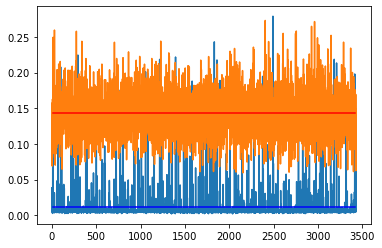

In [122]:
## Web attack
AE_normal_mae = mae_byte_list_normal[0:3432]
plt.plot(AE_normal_mae)
# plt.fill_between([i for i in range(3432)],np.array(AE_normal_mae).mean() + np.array(AE_normal_mae).std(),\
#                  max(np.array(AE_normal_mae).mean() - np.array(AE_normal_mae).std(),0),color = "black",alpha = 0.3)
plt.axhline(y = np.array(AE_normal_mae).mean(), color = 'blue', linestyle = '-',xmin = 0.05, xmax = 0.95)

AE_infiltration_attack_mae = mae_byte_list[0:3432]
plt.plot(AE_infiltration_attack_mae)
# plt.fill_between([i for i in range(3432)],np.array(AE_infiltration_attack_mae).mean() - np.array(AE_infiltration_attack_mae).std(),\
#                  np.array(AE_infiltration_attack_mae).mean() + np.array(AE_infiltration_attack_mae).std(),color = "orange",alpha = 0.3)
plt.axhline(y = np.array(AE_infiltration_attack_mae).mean(), color = 'r', linestyle = '-',xmin = 0.05, xmax = 0.95)

In [ ]:
## Webattack IP header
AE_normal_mae = ip_mae_list_normal[0:3432]
plt.plot(AE_normal_mae)
plt.fill_between([i for i in range(3432)],np.array(AE_normal_mae).mean() + np.array(AE_normal_mae).std(),\
                 max(np.array(AE_normal_mae).mean() - np.array(AE_normal_mae).std(),0),color = "black",alpha = 0.3)
plt.axhline(y = np.array(AE_normal_mae).mean(), color = 'blue', linestyle = '-',xmin = 0.05, xmax = 0.95)

AE_infiltration_attack_mae = ip_mae_list[0:3432]
plt.plot(AE_infiltration_attack_mae)
plt.fill_between([i for i in range(3432)],np.array(AE_infiltration_attack_mae).mean() - np.array(AE_infiltration_attack_mae).std(),\
                 np.array(AE_infiltration_attack_mae).mean() + np.array(AE_infiltration_attack_mae).std(),color = "orange",alpha = 0.3)
plt.axhline(y = np.array(AE_infiltration_attack_mae).mean(), color = 'r', linestyle = '-',xmin = 0.05, xmax = 0.95)

In [ ]:
## Webattack TCP header
AE_normal_mae = tcp_header_mae_list_normal[0:3432]
plt.plot(AE_normal_mae)
plt.fill_between([i for i in range(3432)],np.array(AE_normal_mae).mean() + np.array(AE_normal_mae).std(),\
                 max(np.array(AE_normal_mae).mean() - np.array(AE_normal_mae).std(),0),color = "black",alpha = 0.3)
plt.axhline(y = np.array(AE_normal_mae).mean(), color = 'blue', linestyle = '-',xmin = 0.05, xmax = 0.95)

AE_infiltration_attack_mae = tcp_header_mae_list[0:3432]
plt.plot(AE_infiltration_attack_mae)
plt.fill_between([i for i in range(3432)],np.array(AE_infiltration_attack_mae).mean() - np.array(AE_infiltration_attack_mae).std(),\
                 np.array(AE_infiltration_attack_mae).mean() + np.array(AE_infiltration_attack_mae).std(),color = "orange",alpha = 0.3)
plt.axhline(y = np.array(AE_infiltration_attack_mae).mean(), color = 'r', linestyle = '-',xmin = 0.05, xmax = 0.95)

In [ ]:
## Webattack TCP Options
AE_normal_mae = tcp_options_mae_list_normal[0:3432]
plt.plot(AE_normal_mae)
plt.fill_between([i for i in range(3432)],np.array(AE_normal_mae).mean() + np.array(AE_normal_mae).std(),\
                 max(np.array(AE_normal_mae).mean() - np.array(AE_normal_mae).std(),0),color = "black",alpha = 0.3)
plt.axhline(y = np.array(AE_normal_mae).mean(), color = 'blue', linestyle = '-',xmin = 0.05, xmax = 0.95)

AE_infiltration_attack_mae = tcp_options_mae_list[0:3432]
plt.plot(AE_infiltration_attack_mae)
plt.fill_between([i for i in range(3432)],np.array(AE_infiltration_attack_mae).mean() - np.array(AE_infiltration_attack_mae).std(),\
                 np.array(AE_infiltration_attack_mae).mean() + np.array(AE_infiltration_attack_mae).std(),color = "orange",alpha = 0.3)
plt.axhline(y = np.array(AE_infiltration_attack_mae).mean(), color = 'r', linestyle = '-',xmin = 0.05, xmax = 0.95)

In [ ]:
## Webattack Segment
AE_normal_mae = tcp_segment_mae_list_normal[0:3432]
plt.plot(AE_normal_mae)
plt.fill_between([i for i in range(3432)],np.array(AE_normal_mae).mean() + np.array(AE_normal_mae).std(),\
                 max(np.array(AE_normal_mae).mean() - np.array(AE_normal_mae).std(),0),color = "black",alpha = 0.3)
plt.axhline(y = np.array(AE_normal_mae).mean(), color = 'blue', linestyle = '-',xmin = 0.05, xmax = 0.95)

AE_infiltration_attack_mae = tcp_segment_mae_list[0:3432]
plt.plot(AE_infiltration_attack_mae)
plt.fill_between([i for i in range(3432)],np.array(AE_infiltration_attack_mae).mean() - np.array(AE_infiltration_attack_mae).std(),\
                 np.array(AE_infiltration_attack_mae).mean() + np.array(AE_infiltration_attack_mae).std(),color = "orange",alpha = 0.3)
plt.axhline(y = np.array(AE_infiltration_attack_mae).mean(), color = 'r', linestyle = '-',xmin = 0.05, xmax = 0.95)

In [87]:
mae_byte_avg = sum(mae_byte_list) / np.count_nonzero(mae_byte_list)
print('mae_byte_avg', mae_byte_avg)
mae_byte_per_95 = np.percentile(mae_byte_list, 99)
print('mae_byte_99_percentile', mae_byte_per_95)
mae_byte_per_95 = np.percentile(mae_byte_list, 95)
print('mae_byte_95_percentile', mae_byte_per_95)
mae_byte_per_95 = np.percentile(mae_byte_list, 90)
print('mae_byte_90_percentile', mae_byte_per_95)
ip_mae_avg = sum(ip_mae_list) / np.count_nonzero(ip_mae_list)
print('ip_mae_avg', ip_mae_avg)
tcp_header_mae_avg = sum(tcp_header_mae_list) / np.count_nonzero(tcp_header_mae_list)
print('tcp_header_mae_avg', tcp_header_mae_avg)
tcp_options_mae_avg = sum(tcp_options_mae_list) / np.count_nonzero(tcp_options_mae_list)
print('tcp_header_mae_avg', tcp_options_mae_avg)
tcp_segment_mae_avg = sum(tcp_segment_mae_list) / np.count_nonzero(tcp_segment_mae_list)
print('tcp_segment_mae_avg', tcp_segment_mae_avg)

mae_byte_avg 0.14219397454682375
mae_byte_99_percentile 0.22466711930946293
mae_byte_95_percentile 0.19379227519788025
mae_byte_90_percentile 0.18178273486990987
ip_mae_avg 0.1686539808013034
tcp_header_mae_avg 0.13408889928576762
tcp_header_mae_avg 0.14238290591361344
tcp_segment_mae_avg 0.1258971123673323


In [ ]:
## Brute Force

In [123]:
recon_brute = model_DAE.predict(bruteforce_attack)

In [124]:
mae_byte_list, ip_mae_list, tcp_header_mae_list, tcp_options_mae_list, tcp_segment_mae_list = recon_metrices(bruteforce_attack, recon_brute)

In [125]:
## Classification
count_99 = len([i for i in mae_byte_list if i > 0.14])
print(count_99 / len(mae_byte_list))
count_95 = len([i for i in mae_byte_list if i > 0.03])
print(count_95 / len(mae_byte_list))
count_90 = len([i for i in mae_byte_list if i > 0.01])
print(count_90 / len(mae_byte_list))

0.6108927568781584
1.0
1.0


In [126]:
# save numpy array as csv file
from numpy import asarray
from numpy import savetxt

savetxt('DAE_brute_MAE.csv', mae_byte_list, delimiter=',')

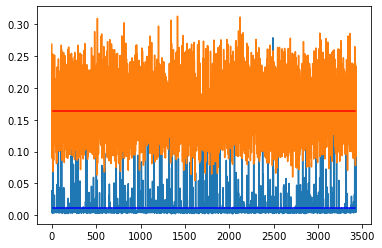

In [127]:
## Brute
AE_normal_mae = mae_byte_list_normal[0:3432]
plt.plot(AE_normal_mae)
# plt.fill_between([i for i in range(3432)],np.array(AE_normal_mae).mean() + np.array(AE_normal_mae).std(),\
#                  max(np.array(AE_normal_mae).mean() - np.array(AE_normal_mae).std(),0),color = "black",alpha = 0.3)
plt.axhline(y = np.array(AE_normal_mae).mean(), color = 'blue', linestyle = '-',xmin = 0.05, xmax = 0.95)

AE_infiltration_attack_mae = mae_byte_list[0:3432]
plt.plot(AE_infiltration_attack_mae)
# plt.fill_between([i for i in range(3432)],np.array(AE_infiltration_attack_mae).mean() - np.array(AE_infiltration_attack_mae).std(),\
#                  np.array(AE_infiltration_attack_mae).mean() + np.array(AE_infiltration_attack_mae).std(),color = "orange",alpha = 0.3)
plt.axhline(y = np.array(AE_infiltration_attack_mae).mean(), color = 'r', linestyle = '-',xmin = 0.05, xmax = 0.95)

In [128]:
mae_byte_avg = sum(mae_byte_list) / np.count_nonzero(mae_byte_list)
print('mae_byte_avg', mae_byte_avg)
mae_byte_per_95 = np.percentile(mae_byte_list, 99)
print('mae_byte_99_percentile', mae_byte_per_95)
mae_byte_per_95 = np.percentile(mae_byte_list, 95)
print('mae_byte_95_percentile', mae_byte_per_95)
mae_byte_per_95 = np.percentile(mae_byte_list, 90)
print('mae_byte_90_percentile', mae_byte_per_95)
ip_mae_avg = sum(ip_mae_list) / np.count_nonzero(ip_mae_list)
print('ip_mae_avg', ip_mae_avg)
tcp_header_mae_avg = sum(tcp_header_mae_list) / np.count_nonzero(tcp_header_mae_list)
print('tcp_header_mae_avg', tcp_header_mae_avg)
tcp_options_mae_avg = sum(tcp_options_mae_list) / np.count_nonzero(tcp_options_mae_list)
print('tcp_header_mae_avg', tcp_options_mae_avg)
tcp_segment_mae_avg = sum(tcp_segment_mae_list) / np.count_nonzero(tcp_segment_mae_list)
print('tcp_segment_mae_avg', tcp_segment_mae_avg)

mae_byte_avg 0.1624187277148906
mae_byte_99_percentile 0.27286796203395536
mae_byte_95_percentile 0.24907965698345166
mae_byte_90_percentile 0.2331802606203952
ip_mae_avg 0.1773552405308108
tcp_header_mae_avg 0.13370377375609077
tcp_header_mae_avg 0.12728246473602933
tcp_segment_mae_avg 0.1889160564713564


In [ ]:
## CICIDS 2018

In [ ]:
df_2018 = pd.read_csv("all_group_train_normalized_2018.csv")

In [ ]:
infiltration_attack = df_2018[df_2018['Label'] == 'Infiltration'].drop(['Label_binary','Label'], axis=1).iloc[:,0:200]
print(infiltration_attack.shape)
# portscan_attack = df_2018[df_2018['Label'] == 'Port Scan'].drop(['Label_binary','Label'], axis=1).iloc[:,0:200]
# print(portscan_attack.shape)
ddos_attack = df_2018[df_2018['Label'] == 'ddos'].drop(['Label_binary','Label'], axis=1).iloc[:,0:200]
print(ddos_attack.shape)
bruteforce_attack = df_2018[df_2018['Label'] == 'Brute Force'].drop(['Label_binary','Label'], axis=1).iloc[:,0:200]
print(bruteforce_attack.shape)
dos_attack = df_2018[df_2018['Label'] == 'DoS'].drop(['Label_binary','Label'], axis=1).iloc[:,0:200]
print(dos_attack.shape)
web_attack = df_2018[df_2018['Label'] == 'Web Attack'].drop(['Label_binary','Label'], axis=1).iloc[:,0:200]
print(web_attack.shape)

In [ ]:
recon_dos = model_DAE.predict(dos_attack)

In [ ]:
recon_ddos = model_DAE.predict(ddos_attack)

In [ ]:
recon_inf = model_DAE.predict(infiltration_attack)

In [ ]:
recon_web = model_DAE.predict(web_attack)

In [ ]:
recon_brute = model_DAE.predict(bruteforce_attack)

In [ ]:
mae_byte_list, ip_mae_list, tcp_header_mae_list, tcp_options_mae_list, tcp_segment_mae_list = recon_metrices(bruteforce_attack, recon_brute)

In [ ]:
## Classification
count_99 = len([i for i in mae_byte_list if i > 0.14])
print(count_99 / len(mae_byte_list))
count_95 = len([i for i in mae_byte_list if i > 0.03])
print(count_95 / len(mae_byte_list))
count_90 = len([i for i in mae_byte_list if i > 0.01])
print(count_90 / len(mae_byte_list))

In [ ]:
## 
AE_normal_mae = mae_byte_list_normal[0:3432]
plt.plot(AE_normal_mae)
plt.fill_between([i for i in range(3432)],np.array(AE_normal_mae).mean() + np.array(AE_normal_mae).std(),\
                 max(np.array(AE_normal_mae).mean() - np.array(AE_normal_mae).std(),0),color = "black",alpha = 0.3)
plt.axhline(y = np.array(AE_normal_mae).mean(), color = 'blue', linestyle = '-',xmin = 0.05, xmax = 0.95)

AE_infiltration_attack_mae = mae_byte_list[0:3432]
plt.plot(AE_infiltration_attack_mae)
plt.fill_between([i for i in range(3432)],np.array(AE_infiltration_attack_mae).mean() - np.array(AE_infiltration_attack_mae).std(),\
                 np.array(AE_infiltration_attack_mae).mean() + np.array(AE_infiltration_attack_mae).std(),color = "orange",alpha = 0.3)
plt.axhline(y = np.array(AE_infiltration_attack_mae).mean(), color = 'r', linestyle = '-',xmin = 0.05, xmax = 0.95)

In [ ]:
mae_byte_avg = sum(mae_byte_list) / np.count_nonzero(mae_byte_list)
print('mae_byte_avg', mae_byte_avg)
mae_byte_per_95 = np.percentile(mae_byte_list, 99)
print('mae_byte_99_percentile', mae_byte_per_95)
mae_byte_per_95 = np.percentile(mae_byte_list, 95)
print('mae_byte_95_percentile', mae_byte_per_95)
mae_byte_per_95 = np.percentile(mae_byte_list, 90)
print('mae_byte_90_percentile', mae_byte_per_95)
ip_mae_avg = sum(ip_mae_list) / np.count_nonzero(ip_mae_list)
print('ip_mae_avg', ip_mae_avg)
tcp_header_mae_avg = sum(tcp_header_mae_list) / np.count_nonzero(tcp_header_mae_list)
print('tcp_header_mae_avg', tcp_header_mae_avg)
tcp_options_mae_avg = sum(tcp_options_mae_list) / np.count_nonzero(tcp_options_mae_list)
print('tcp_header_mae_avg', tcp_options_mae_avg)
tcp_segment_mae_avg = sum(tcp_segment_mae_list) / np.count_nonzero(tcp_segment_mae_list)
print('tcp_segment_mae_avg', tcp_segment_mae_avg)

In [ ]:
## Adv examples

In [129]:
p1 = pd.read_csv('adv_examples_portscan_DT.csv')
p2 = pd.read_csv('adv_examples_portscan_RF.csv')
p3 = pd.read_csv('adv_examples_portscan_SVC.csv')
p4 = pd.read_csv('adv_examples_portscan_MLP.csv')

In [130]:
port_adv = pd.concat([p1,p2,p3,p4]).sample(frac = 1).iloc[:,0:200]

In [131]:
recon_adv_port = model_DAE.predict(port_adv)

In [132]:
mae_byte_list, ip_mae_list, tcp_header_mae_list, tcp_options_mae_list, tcp_segment_mae_list = recon_metrices(port_adv, recon_adv_port)

In [133]:
## Classification
count_99 = len([i for i in mae_byte_list if i > 0.14])
print(count_99 / len(mae_byte_list))
count_95 = len([i for i in mae_byte_list if i > 0.03])
print(count_95 / len(mae_byte_list))
count_90 = len([i for i in mae_byte_list if i > 0.01])
print(count_90 / len(mae_byte_list))

0.744861710225831
1.0
1.0


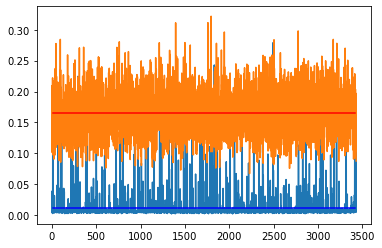

In [135]:
## 
AE_normal_mae = mae_byte_list_normal[0:3432]
plt.plot(AE_normal_mae)
# plt.fill_between([i for i in range(3432)],np.array(AE_normal_mae).mean() + np.array(AE_normal_mae).std(),\
#                  max(np.array(AE_normal_mae).mean() - np.array(AE_normal_mae).std(),0),color = "black",alpha = 0.3)
plt.axhline(y = np.array(AE_normal_mae).mean(), color = 'blue', linestyle = '-',xmin = 0.05, xmax = 0.95)

AE_infiltration_attack_mae = mae_byte_list[0:3432]
plt.plot(AE_infiltration_attack_mae)
# plt.fill_between([i for i in range(3432)],np.array(AE_infiltration_attack_mae).mean() - np.array(AE_infiltration_attack_mae).std(),\
#                  np.array(AE_infiltration_attack_mae).mean() + np.array(AE_infiltration_attack_mae).std(),color = "orange",alpha = 0.3)
plt.axhline(y = np.array(AE_infiltration_attack_mae).mean(), color = 'r', linestyle = '-',xmin = 0.05, xmax = 0.95)

In [136]:
mae_byte_avg = sum(mae_byte_list) / np.count_nonzero(mae_byte_list)
print('mae_byte_avg', mae_byte_avg)
mae_byte_per_95 = np.percentile(mae_byte_list, 99)
print('mae_byte_99_percentile', mae_byte_per_95)
mae_byte_per_95 = np.percentile(mae_byte_list, 95)
print('mae_byte_95_percentile', mae_byte_per_95)
mae_byte_per_95 = np.percentile(mae_byte_list, 90)
print('mae_byte_90_percentile', mae_byte_per_95)
ip_mae_avg = sum(ip_mae_list) / np.count_nonzero(ip_mae_list)
print('ip_mae_avg', ip_mae_avg)
tcp_header_mae_avg = sum(tcp_header_mae_list) / np.count_nonzero(tcp_header_mae_list)
print('tcp_header_mae_avg', tcp_header_mae_avg)
tcp_options_mae_avg = sum(tcp_options_mae_list) / np.count_nonzero(tcp_options_mae_list)
print('tcp_header_mae_avg', tcp_options_mae_avg)
tcp_segment_mae_avg = sum(tcp_segment_mae_list) / np.count_nonzero(tcp_segment_mae_list)
print('tcp_segment_mae_avg', tcp_segment_mae_avg)

mae_byte_avg 0.16469421273188842
mae_byte_99_percentile 0.253483790385252
mae_byte_95_percentile 0.22535439018499548
mae_byte_90_percentile 0.21123716308586718
ip_mae_avg 0.20630648328623902
tcp_header_mae_avg 0.14125612572911353
tcp_header_mae_avg 0.0852919623896434
tcp_segment_mae_avg 0.13146336379341644


In [137]:
d1 = pd.read_csv('adv_examples_dos_DT.csv')
d2 = pd.read_csv('adv_examples_dos_RF.csv')
d3 = pd.read_csv('adv_examples_dos_SVC.csv')
d4 = pd.read_csv('adv_examples_dos_MLP.csv')

In [138]:
dos_adv = pd.concat([d1,d2,d3,d4]).sample(frac = 1).iloc[:,0:200]

In [139]:
recon_adv_dos = model_DAE.predict(dos_adv)

In [140]:
mae_byte_list, ip_mae_list, tcp_header_mae_list, tcp_options_mae_list, tcp_segment_mae_list = recon_metrices(dos_adv, recon_adv_dos)

In [141]:
## Classification
count_99 = len([i for i in mae_byte_list if i > 0.14])
print(count_99 / len(mae_byte_list))
count_95 = len([i for i in mae_byte_list if i > 0.03])
print(count_95 / len(mae_byte_list))
count_90 = len([i for i in mae_byte_list if i > 0.01])
print(count_90 / len(mae_byte_list))

0.7196212054164085
1.0
1.0


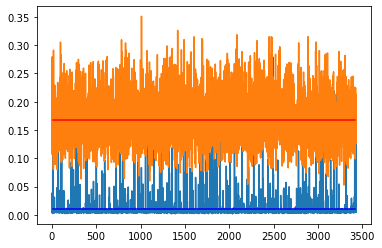

In [143]:
## 
AE_normal_mae = mae_byte_list_normal[0:3432]
plt.plot(AE_normal_mae)
# plt.fill_between([i for i in range(3432)],np.array(AE_normal_mae).mean() + np.array(AE_normal_mae).std(),\
#                  max(np.array(AE_normal_mae).mean() - np.array(AE_normal_mae).std(),0),color = "black",alpha = 0.3)
plt.axhline(y = np.array(AE_normal_mae).mean(), color = 'blue', linestyle = '-',xmin = 0.05, xmax = 0.95)

AE_infiltration_attack_mae = mae_byte_list[0:3432]
plt.plot(AE_infiltration_attack_mae)
# plt.fill_between([i for i in range(3432)],np.array(AE_infiltration_attack_mae).mean() - np.array(AE_infiltration_attack_mae).std(),\
#                  np.array(AE_infiltration_attack_mae).mean() + np.array(AE_infiltration_attack_mae).std(),color = "orange",alpha = 0.3)
plt.axhline(y = np.array(AE_infiltration_attack_mae).mean(), color = 'r', linestyle = '-',xmin = 0.05, xmax = 0.95)

In [144]:
mae_byte_avg = sum(mae_byte_list) / np.count_nonzero(mae_byte_list)
print('mae_byte_avg', mae_byte_avg)
mae_byte_per_95 = np.percentile(mae_byte_list, 99)
print('mae_byte_99_percentile', mae_byte_per_95)
mae_byte_per_95 = np.percentile(mae_byte_list, 95)
print('mae_byte_95_percentile', mae_byte_per_95)
mae_byte_per_95 = np.percentile(mae_byte_list, 90)
print('mae_byte_90_percentile', mae_byte_per_95)
ip_mae_avg = sum(ip_mae_list) / np.count_nonzero(ip_mae_list)
print('ip_mae_avg', ip_mae_avg)
tcp_header_mae_avg = sum(tcp_header_mae_list) / np.count_nonzero(tcp_header_mae_list)
print('tcp_header_mae_avg', tcp_header_mae_avg)
tcp_options_mae_avg = sum(tcp_options_mae_list) / np.count_nonzero(tcp_options_mae_list)
print('tcp_header_mae_avg', tcp_options_mae_avg)
tcp_segment_mae_avg = sum(tcp_segment_mae_list) / np.count_nonzero(tcp_segment_mae_list)
print('tcp_segment_mae_avg', tcp_segment_mae_avg)

mae_byte_avg 0.16927270419274576
mae_byte_99_percentile 0.2836380323114797
mae_byte_95_percentile 0.25144151988880276
mae_byte_90_percentile 0.2318398149825676
ip_mae_avg 0.1984501673809329
tcp_header_mae_avg 0.15057002769271813
tcp_header_mae_avg 0.2506480416408981
tcp_segment_mae_avg 0.10678874082177421


In [145]:
dd1 = pd.read_csv('adv_examples_ddos_DT.csv')
dd2 = pd.read_csv('adv_examples_ddos_RF.csv')
dd3 = pd.read_csv('adv_examples_ddos_SVC.csv')
dd4 = pd.read_csv('adv_examples_ddos_MLP.csv')

In [146]:
ddos_adv = pd.concat([dd1,dd2,dd3,dd4]).sample(frac = 1).iloc[:,0:200]

In [147]:
recon_adv_ddos = model_DAE.predict(ddos_adv)

In [148]:
mae_byte_list, ip_mae_list, tcp_header_mae_list, tcp_options_mae_list, tcp_segment_mae_list = recon_metrices(ddos_adv, recon_adv_ddos)

In [149]:
## Classification
count_99 = len([i for i in mae_byte_list if i > 0.14])
print(count_99 / len(mae_byte_list))
count_95 = len([i for i in mae_byte_list if i > 0.03])
print(count_95 / len(mae_byte_list))
count_90 = len([i for i in mae_byte_list if i > 0.01])
print(count_90 / len(mae_byte_list))

0.31755542240862794
1.0
1.0


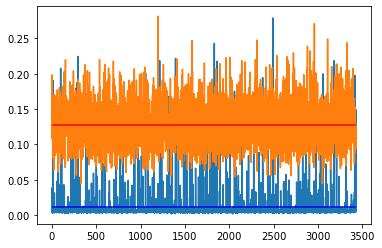

In [151]:
## 
AE_normal_mae = mae_byte_list_normal[0:3432]
plt.plot(AE_normal_mae)
# plt.fill_between([i for i in range(3432)],np.array(AE_normal_mae).mean() + np.array(AE_normal_mae).std(),\
#                  max(np.array(AE_normal_mae).mean() - np.array(AE_normal_mae).std(),0),color = "black",alpha = 0.3)
plt.axhline(y = np.array(AE_normal_mae).mean(), color = 'blue', linestyle = '-',xmin = 0.05, xmax = 0.95)

AE_infiltration_attack_mae = mae_byte_list[0:3432]
plt.plot(AE_infiltration_attack_mae)
# plt.fill_between([i for i in range(3432)],np.array(AE_infiltration_attack_mae).mean() - np.array(AE_infiltration_attack_mae).std(),\
#                  np.array(AE_infiltration_attack_mae).mean() + np.array(AE_infiltration_attack_mae).std(),color = "orange",alpha = 0.3)
plt.axhline(y = np.array(AE_infiltration_attack_mae).mean(), color = 'r', linestyle = '-',xmin = 0.05, xmax = 0.95)

In [152]:
mae_byte_avg = sum(mae_byte_list) / np.count_nonzero(mae_byte_list)
print('mae_byte_avg', mae_byte_avg)
mae_byte_per_95 = np.percentile(mae_byte_list, 99)
print('mae_byte_99_percentile', mae_byte_per_95)
mae_byte_per_95 = np.percentile(mae_byte_list, 95)
print('mae_byte_95_percentile', mae_byte_per_95)
mae_byte_per_95 = np.percentile(mae_byte_list, 90)
print('mae_byte_90_percentile', mae_byte_per_95)
ip_mae_avg = sum(ip_mae_list) / np.count_nonzero(ip_mae_list)
print('ip_mae_avg', ip_mae_avg)
tcp_header_mae_avg = sum(tcp_header_mae_list) / np.count_nonzero(tcp_header_mae_list)
print('tcp_header_mae_avg', tcp_header_mae_avg)
tcp_options_mae_avg = sum(tcp_options_mae_list) / np.count_nonzero(tcp_options_mae_list)
print('tcp_header_mae_avg', tcp_options_mae_avg)
tcp_segment_mae_avg = sum(tcp_segment_mae_list) / np.count_nonzero(tcp_segment_mae_list)
print('tcp_segment_mae_avg', tcp_segment_mae_avg)

mae_byte_avg 0.1280214215272797
mae_byte_99_percentile 0.20867471153587278
mae_byte_95_percentile 0.1809803111240294
mae_byte_90_percentile 0.16716920275569028
ip_mae_avg 0.1493861845465425
tcp_header_mae_avg 0.11655505966113629
tcp_header_mae_avg 0.09905430935467126
tcp_segment_mae_avg 0.1046210466931829


In [153]:
inf1 = pd.read_csv('adv_examples_infiltration_DT.csv')
inf2 = pd.read_csv('adv_examples_infiltration_RF.csv')
inf3 = pd.read_csv('adv_examples_infiltration_SVC.csv')
inf4 = pd.read_csv('adv_examples_infiltration_MLP.csv')

In [154]:
inf_adv = pd.concat([inf1,inf2,inf3,inf4]).sample(frac = 1).iloc[:,0:200]

In [155]:
recon_adv_inf = model_DAE.predict(inf_adv)

In [156]:
mae_byte_list, ip_mae_list, tcp_header_mae_list, tcp_options_mae_list, tcp_segment_mae_list = recon_metrices(inf_adv, recon_adv_inf)

In [157]:
## Classification
count_99 = len([i for i in mae_byte_list if i > 0.14])
print(count_99 / len(mae_byte_list))
count_95 = len([i for i in mae_byte_list if i > 0.03])
print(count_95 / len(mae_byte_list))
count_90 = len([i for i in mae_byte_list if i > 0.01])
print(count_90 / len(mae_byte_list))

0.458273587611127
1.0
1.0


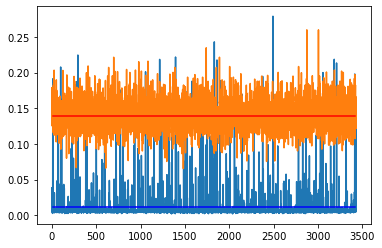

In [158]:
## 
AE_normal_mae = mae_byte_list_normal[0:3432]
plt.plot(AE_normal_mae)
# plt.fill_between([i for i in range(3432)],np.array(AE_normal_mae).mean() + np.array(AE_normal_mae).std(),\
#                  max(np.array(AE_normal_mae).mean() - np.array(AE_normal_mae).std(),0),color = "black",alpha = 0.3)
plt.axhline(y = np.array(AE_normal_mae).mean(), color = 'blue', linestyle = '-',xmin = 0.05, xmax = 0.95)

AE_infiltration_attack_mae = mae_byte_list[0:3432]
plt.plot(AE_infiltration_attack_mae)
# plt.fill_between([i for i in range(3432)],np.array(AE_infiltration_attack_mae).mean() - np.array(AE_infiltration_attack_mae).std(),\
#                  np.array(AE_infiltration_attack_mae).mean() + np.array(AE_infiltration_attack_mae).std(),color = "orange",alpha = 0.3)
plt.axhline(y = np.array(AE_infiltration_attack_mae).mean(), color = 'r', linestyle = '-',xmin = 0.05, xmax = 0.95)

In [159]:
mae_byte_avg = sum(mae_byte_list) / np.count_nonzero(mae_byte_list)
print('mae_byte_avg', mae_byte_avg)
mae_byte_per_95 = np.percentile(mae_byte_list, 99)
print('mae_byte_99_percentile', mae_byte_per_95)
mae_byte_per_95 = np.percentile(mae_byte_list, 95)
print('mae_byte_95_percentile', mae_byte_per_95)
mae_byte_per_95 = np.percentile(mae_byte_list, 90)
print('mae_byte_90_percentile', mae_byte_per_95)
ip_mae_avg = sum(ip_mae_list) / np.count_nonzero(ip_mae_list)
print('ip_mae_avg', ip_mae_avg)
tcp_header_mae_avg = sum(tcp_header_mae_list) / np.count_nonzero(tcp_header_mae_list)
print('tcp_header_mae_avg', tcp_header_mae_avg)
tcp_options_mae_avg = sum(tcp_options_mae_list) / np.count_nonzero(tcp_options_mae_list)
print('tcp_header_mae_avg', tcp_options_mae_avg)
tcp_segment_mae_avg = sum(tcp_segment_mae_list) / np.count_nonzero(tcp_segment_mae_list)
print('tcp_segment_mae_avg', tcp_segment_mae_avg)

mae_byte_avg 0.13935565410260045
mae_byte_99_percentile 0.19612150001196843
mae_byte_95_percentile 0.17954114503522167
mae_byte_90_percentile 0.16704207691352096
ip_mae_avg 0.1550960550781393
tcp_header_mae_avg 0.12907531727658034
tcp_header_mae_avg 0.15905802177998346
tcp_segment_mae_avg 0.13849778309866814
